In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

In [2]:
# Folder for saving models
saving_folder = "./models"

In [3]:
# Laoding the dataset
df = pd.read_csv("data.csv")

df

,name,main_category
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances
...,...,...
1103165,Adidas Regular Fit Men's Track Tops,sports & fitness
1103166,Redwolf Noice Toit Smort - Hoodie (Black),sports & fitness
1103167,Redwolf Schrute Farms B&B - Hoodie (Navy Blue),sports & fitness
1103168,Puma Men Shorts,sports & fitness


In [4]:
# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['name'])

X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10956404 stored elements and shape (1103170, 5000)>

In [5]:
# Label Encoding
le = LabelEncoder()
y = le.fit_transform(df['main_category'])

classeslist = le.classes_.tolist()
print(len(classeslist))
classeslist

20


['accessories',
 'appliances',
 'bags & luggage',
 'beauty & health',
 'car & motorbike',
 'grocery & gourmet foods',
 'home & kitchen',
 'home, kitchen, pets',
 'industrial supplies',
 "kids' fashion",
 "men's clothing",
 "men's shoes",
 'music',
 'pet supplies',
 'sports & fitness',
 'stores',
 'toys & baby products',
 'tv, audio & cameras',
 "women's clothing",
 "women's shoes"]

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test)
print(y_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2192515 stored elements and shape (220634, 5000)>
  Coords	Values
  (0, 773)	0.2284327803397737
  (0, 2636)	0.2754244505262936
  (0, 1993)	0.3958788714629468
  (0, 3987)	0.24890524926155005
  (0, 2898)	0.16209014292718996
  (0, 609)	0.5599163859468852
  (0, 919)	0.5599163859468852
  (1, 4862)	0.22810606801652758
  (1, 1141)	0.33204161652897957
  (1, 409)	0.34631102621346865
  (1, 3266)	0.5110177322733266
  (1, 4680)	0.2810186706848594
  (1, 1335)	0.42753630999625303
  (1, 1161)	0.4414597913891644
  (2, 717)	0.5060710867623659
  (2, 4906)	0.17749249216139065
  (2, 1174)	0.4731858768827433
  (2, 4531)	0.6989160151893831
  (3, 2898)	0.2422011162564201
  (3, 4727)	0.6337662280100668
  (3, 3977)	0.36962601546236185
  (3, 2202)	0.6348665971772761
  (4, 1884)	0.1531551194509864
  (4, 50)	0.19922877169128292
  (4, 2546)	0.20943086374327988
  :	:
  (220631, 2140)	0.5433012215950421
  (220632, 4898)	0.22630929060148794
  (220632, 3493

In [7]:
# Model (Sparse supported)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                         precision    recall  f1-score   support

            accessories       0.88      0.95      0.91     46242
             appliances       0.94      0.97      0.96     13209
         bags & luggage       0.70      0.46      0.55      4248
        beauty & health       0.85      0.87      0.86      4023
        car & motorbike       0.89      0.82      0.85      2818
grocery & gourmet foods       0.83      0.89      0.86      1337
         home & kitchen       0.81      0.81      0.81      5763
    home, kitchen, pets       0.00      0.00      0.00        11
    industrial supplies       0.80      0.63      0.71      1624
          kids' fashion       0.80      0.71      0.75      5367
         men's clothing       0.95      0.98      0.97     30696
            men's shoes       0.87      0.95      0.91     23077
                  music       0.90      0.59      0.71       400
           pet supplies       0.97      0.86      0.91       646
       sports & fitness 

/home/yegekucuk/venv/bitirme/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yegekucuk/venv/bitirme/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/yegekucuk/venv/bitirme/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

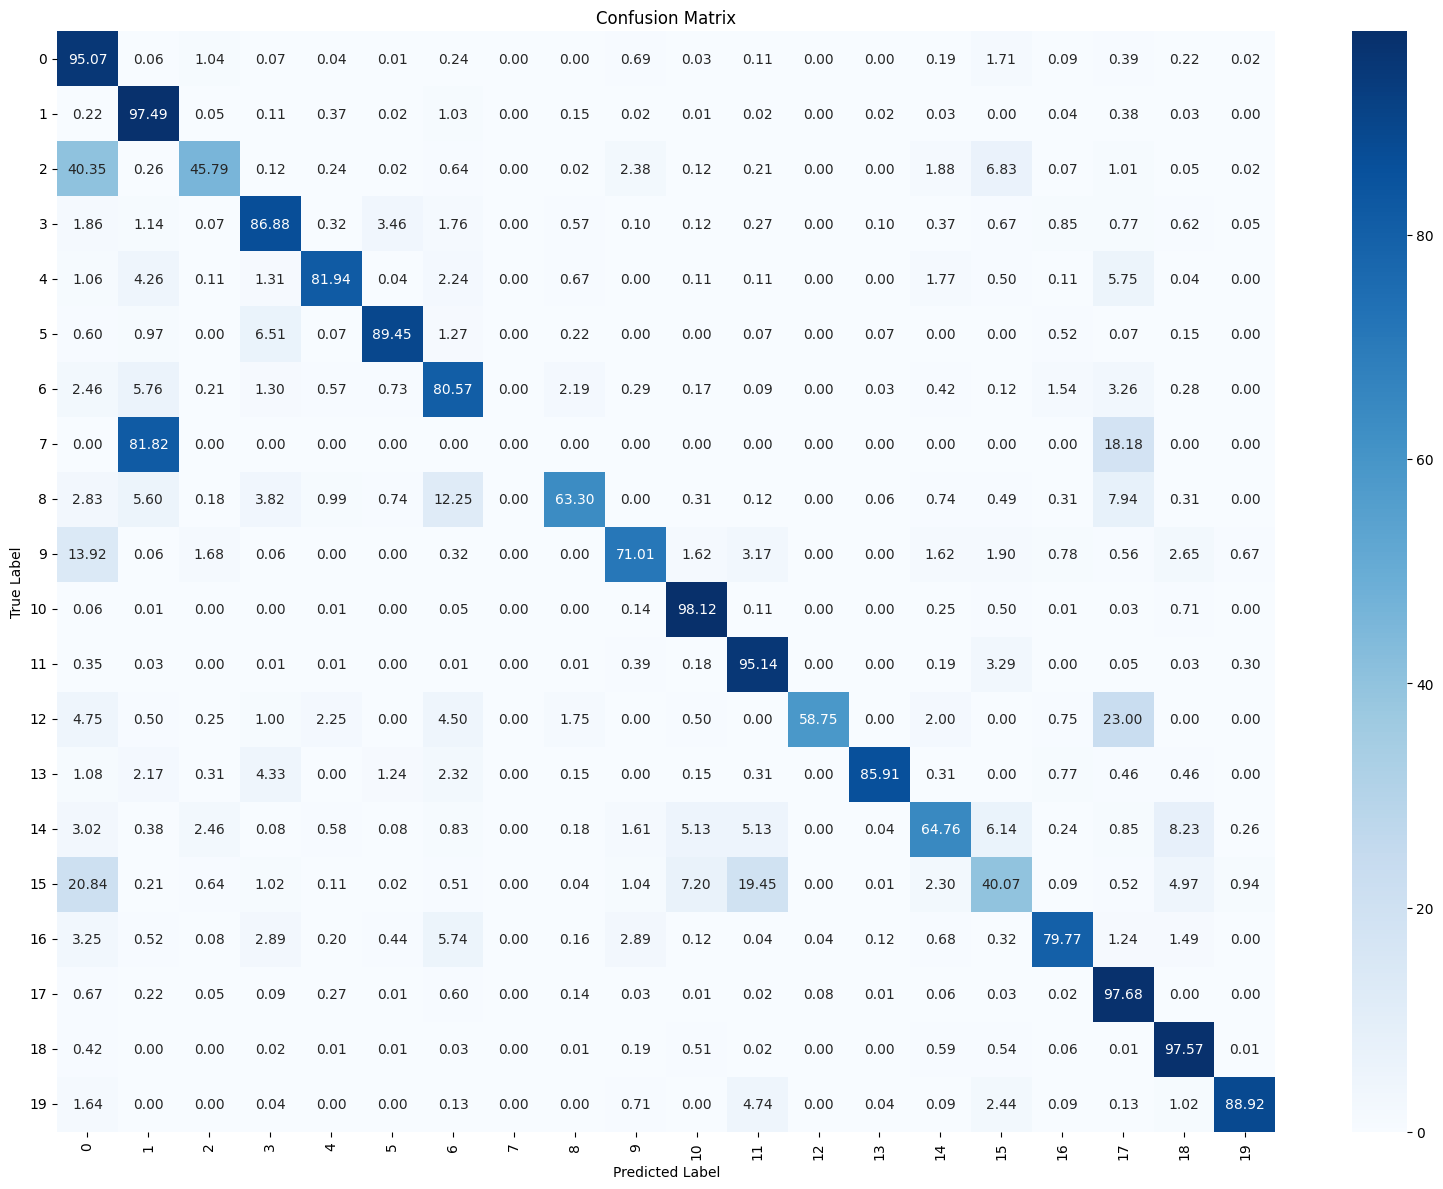

In [ ]:
# Confusion matrix'i hesapla
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Etiket isimleri
labels = model.classes_

# Görselleştir
plt.figure(figsize=(16, 12))
sns.heatmap(cm * 100, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [9]:
# Save the model
import pickle

with open(f'{saving_folder}/model.pkl', 'wb') as f:
    pickle.dump(model, f)